<a href="https://colab.research.google.com/github/ivoytov/manhattan/blob/master/sunset_comps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

,property type,address,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
SOLD DATE,,,,,,,,,,
2021-01-29,Single Family Residential,1544 18th Ave,2200000.0,4.0,2.5,2485.0,2996.0,1928.0,28.0,885.311871
2021-01-27,Single Family Residential,717 Lawton St,1520000.0,3.0,1.0,1337.0,2848.0,1956.0,30.0,1136.873598
2021-01-26,Single Family Residential,616 Moraga St #4,779000.0,1.0,1.0,716.0,2996.0,1958.0,31.0,1087.988827
2021-01-26,Single Family Residential,1547 20th Ave,2280000.0,3.0,3.5,1898.0,3598.0,1920.0,31.0,1201.264489
2021-01-15,Single Family Residential,1001 Judah St,2050000.0,5.0,4.5,3770.0,2173.0,1937.0,42.0,543.766578


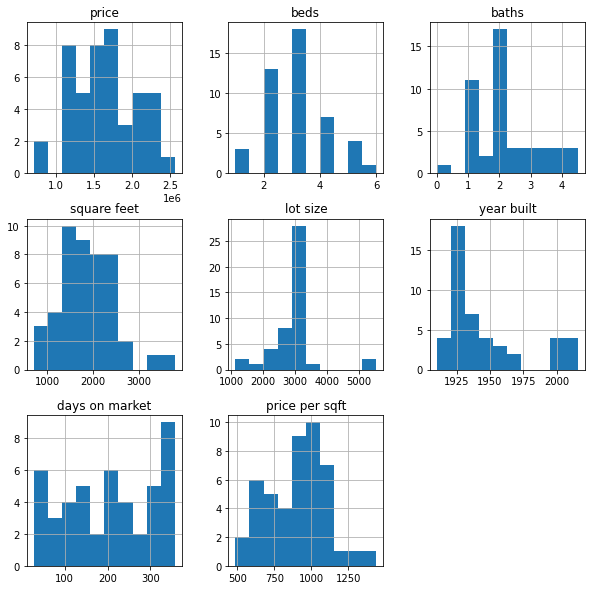

In [148]:
df = pd.read_csv('/content/drive/MyDrive/redfin_2021-02-26-08-17-48.csv', parse_dates=['SOLD DATE'], index_col='SOLD DATE').sort_index(ascending=False)
df = df[['PROPERTY TYPE', 'ADDRESS', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET']]
df.columns = df.columns.str.lower()
rare_cols = ['lot size', 'year built']
df['price per sqft'] = df.price / df['square feet']
df = df.dropna(subset=df.columns.drop(rare_cols))
median = df[rare_cols].median()
df[rare_cols] = df[rare_cols].fillna(median)
df.hist(bins=10, figsize=(10,10))
df.head()

In [149]:
df[df['property type'] == 'Condo/Co-op'].describe().astype(int)

,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
count,8,8,8,8,8,8,8,8
mean,1496625,2,1,1473,2936,1968,234,1008
std,492770,0,1,439,167,45,74,74
min,705000,1,1,726,2522,1924,119,905
25%,1188750,2,1,1284,2996,1925,206,966
50%,1517500,2,1,1518,2996,1967,231,996
75%,1760750,3,2,1638,2996,2008,276,1043
max,2205000,3,3,2213,2996,2016,330,1153


In [150]:
nineteenth = df[df.address.str.contains('19th Ave')]
nineteenth.head()


,property type,address,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
SOLD DATE,,,,,,,,,,
2020-08-07,Townhouse,1697 19th Ave,1200000.0,2.0,2.0,1780.0,2996.0,2002.0,203.0,674.157303
2020-04-17,Townhouse,1711 19th Ave,1315000.0,2.0,2.0,1920.0,2996.0,2001.0,315.0,684.895833
2020-03-06,Multi-Family (2-4 Unit),1341 19th Ave,2000000.0,5.0,4.0,2784.0,2210.0,1971.0,357.0,718.390805


In [151]:
nineteenth.describe().astype(int)

,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
count,3,3,3,3,3,3,3,3
mean,1505000,3,2,2161,2734,1991,291,692
std,432521,1,1,543,453,17,79,23
min,1200000,2,2,1780,2210,1971,203,674
25%,1257500,2,2,1850,2603,1986,259,679
50%,1315000,2,2,1920,2996,2001,315,684
75%,1657500,3,3,2352,2996,2001,336,701
max,2000000,5,4,2784,2996,2002,357,718


In [152]:
threetwo = df[(df.beds == 3) & (df.baths == 2)]
threetwo

,property type,address,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
SOLD DATE,,,,,,,,,,
2020-10-30,Condo/Co-op,1517 Irving St #2,1670000.0,3.0,2.0,1601.0,2522.0,2006.0,119.0,1043.098064
2020-10-07,Single Family Residential,1682 23rd Ave,1680000.0,3.0,2.0,1985.0,2063.0,1929.0,142.0,846.347607
2020-09-11,Single Family Residential,910 Lawton St,2300000.0,3.0,2.0,2100.0,5545.0,1947.0,168.0,1095.238095
2020-09-04,Single Family Residential,1330 Kirkham St,1650000.0,3.0,2.0,1855.0,2526.0,1928.0,175.0,889.487871
2020-08-10,Single Family Residential,1642 16th Ave,1780800.0,3.0,2.0,1840.0,2769.0,1938.0,200.0,967.826087
2020-05-18,Single Family Residential,1590 25th Ave,1451000.0,3.0,2.0,1450.0,1746.0,1957.0,284.0,1000.689655
2020-04-03,Condo/Co-op,1517 Irving St #1,1675000.0,3.0,2.0,1601.0,2996.0,2006.0,329.0,1046.221112
2020-03-31,Single Family Residential,1139 Judah St,1441001.0,3.0,2.0,1000.0,2500.0,1924.0,332.0,1441.001000


In [153]:
threetwo.describe().astype(int)

,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
count,8,8,8,8,8,8,8,8
mean,1705975,3,2,1679,2833,1954,218,1041
std,267194,0,0,349,1162,33,84,181
min,1441001,3,2,1000,1746,1924,119,846
25%,1600250,3,2,1563,2390,1928,161,948
50%,1672500,3,2,1720,2524,1942,187,1021
75%,1705200,3,2,1887,2825,1969,295,1058
max,2300000,3,2,2100,5545,2006,332,1441


In [154]:
twothousand = df[(df['square feet'] < 2300) & (df['square feet'] > 1700)]
twothousand

,property type,address,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
SOLD DATE,,,,,,,,,,
2021-01-26,Single Family Residential,1547 20th Ave,2280000.0,3.0,3.50,1898.0,3598.0,1920.0,31.0,1201.264489
2020-12-18,Single Family Residential,1718 17th Ave,1550000.0,3.0,1.25,1887.0,2495.0,1936.0,70.0,821.409645
2020-11-24,Townhouse,1732 20th Ave,1450000.0,4.0,3.00,2225.0,2996.0,2001.0,94.0,651.685393
2020-10-21,Single Family Residential,1507 18th Ave,1675000.0,3.0,2.50,2030.0,2374.0,1930.0,128.0,825.123153
2020-10-07,Single Family Residential,1682 23rd Ave,1680000.0,3.0,2.00,1985.0,2063.0,1929.0,142.0,846.347607
2020-09-11,Single Family Residential,910 Lawton St,2300000.0,3.0,2.00,2100.0,5545.0,1947.0,168.0,1095.238095
2020-09-04,Single Family Residential,1330 Kirkham St,1650000.0,3.0,2.00,1855.0,2526.0,1928.0,175.0,889.487871
2020-08-10,Single Family Residential,1642 16th Ave,1780800.0,3.0,2.00,1840.0,2769.0,1938.0,200.0,967.826087
2020-08-07,Townhouse,1736 A 20th Ave,1450000.0,3.0,3.00,2225.0,2996.0,2001.0,203.0,651.685393


In [155]:
threetwo.describe().astype(int)

,price,beds,baths,square feet,lot size,year built,days on market,price per sqft
count,8,8,8,8,8,8,8,8
mean,1705975,3,2,1679,2833,1954,218,1041
std,267194,0,0,349,1162,33,84,181
min,1441001,3,2,1000,1746,1924,119,846
25%,1600250,3,2,1563,2390,1928,161,948
50%,1672500,3,2,1720,2524,1942,187,1021
75%,1705200,3,2,1887,2825,1969,295,1058
max,2300000,3,2,2100,5545,2006,332,1441


In [156]:
df['housesize_sqftbins'] = pd.qcut(df['square feet'], 4)
df['yearbuilt_bins'] = pd.qcut(df['year built'], 4)
df.pivot_table(values='price per sqft', index='housesize_sqftbins', columns='property type', aggfunc='median', margins=True).round(0)

property type,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse,All
housesize_sqftbins,,,,,
"(715.999, 1401.25]",971.0,871.0,1130.0,NaN,1043.0
"(1401.25, 1871.0]",1045.0,611.0,968.0,674.0,968.0
"(1871.0, 2262.75]",996.0,NaN,846.0,652.0,825.0
"(2262.75, 3770.0]",NaN,708.0,774.0,NaN,713.0
All,997.0,708.0,937.0,663.0,901.0


In [157]:
df.pivot_table(values='price per sqft', index='housesize_sqftbins', columns='property type', aggfunc='mean', margins=True).round(0)

property type,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse,All
housesize_sqftbins,,,,,
"(715.999, 1401.25]",958.0,871.0,1138.0,NaN,1071.0
"(1401.25, 1871.0]",1048.0,611.0,975.0,674.0,941.0
"(1871.0, 2262.75]",996.0,NaN,927.0,663.0,861.0
"(2262.75, 3770.0]",NaN,688.0,773.0,NaN,752.0
All,1008.0,709.0,946.0,666.0,906.0


In [158]:
df.pivot_table(values='price per sqft', index='housesize_sqftbins', columns='property type', aggfunc='count', margins=True)

property type,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse,All
housesize_sqftbins,,,,,
"(715.999, 1401.25]",3.0,1.0,8.0,NaN,12
"(1401.25, 1871.0]",4.0,1.0,5.0,1.0,11
"(1871.0, 2262.75]",1.0,NaN,7.0,3.0,11
"(2262.75, 3770.0]",NaN,3.0,9.0,NaN,12
All,8.0,5.0,29.0,4.0,46


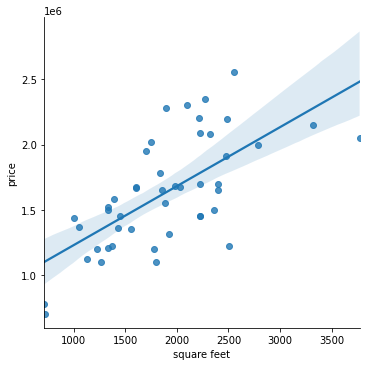

In [159]:
sns.lmplot(x='square feet',y='price',data=df,fit_reg=True)

In [128]:
num_cols = ['beds', 'baths', 'square feet', 'year built']
housing_num = df[num_cols]
housing_num.loc[:, 'year built'] = housing_num['year built'].apply(lambda x: 2021 - x)
housing_num.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,beds,baths,square feet,year built
SOLD DATE,,,,
2021-01-29,4.0,2.5,2485.0,93.0
2021-01-27,3.0,1.0,1337.0,65.0
2021-01-26,1.0,1.0,716.0,63.0
2021-01-26,3.0,3.5,1898.0,101.0
2021-01-15,5.0,4.5,3770.0,84.0


In [129]:
housing_cat = df['property type'].str.get_dummies()
housing_cat.head()

,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse
SOLD DATE,,,,
2021-01-29,0,0,1,0
2021-01-27,0,0,1,0
2021-01-26,0,0,1,0
2021-01-26,0,0,1,0
2021-01-15,0,0,1,0


In [130]:
housing_prepared = pd.concat([housing_num], axis=1)
housing_prepared.head()

,beds,baths,square feet,year built
SOLD DATE,,,,
2021-01-29,4.0,2.5,2485.0,93.0
2021-01-27,3.0,1.0,1337.0,65.0
2021-01-26,1.0,1.0,716.0,63.0
2021-01-26,3.0,3.5,1898.0,101.0
2021-01-15,5.0,4.5,3770.0,84.0


In [132]:
linreg = LinearRegression()
linreg.fit(housing_prepared, df['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
list(zip(housing_prepared.columns, linreg.coef_)) + [('Intercept', linreg.intercept_)]

[('beds', 28485.87410811272),
 ('baths', 21573.18214264173),
 ('square feet', 384.7291179877284),
 ('year built', -609.1607941231933),
 ('Intercept', 818119.4287127049)]

In [134]:
target = [5, 3, 2169, 21]
linreg.predict(np.array(target).reshape(1,-1))[0].round(0)

1846953.0